In [1]:
# connect colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
data = pd.read_csv("/content/drive/MyDrive/dataset/Most Streamed Spotify Songs 2024.csv", encoding='unicode_escape')
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

## Data Preprocessing

In [5]:
df = data.iloc[:, :11]
df.head(20)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",83.0
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",86.0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",92.0
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,NaN
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",86.0


In [6]:
# check for duplicated columns
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

2
0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4598 non-null   object 
 1   Album Name              4598 non-null   object 
 2   Artist                  4593 non-null   object 
 3   Release Date            4598 non-null   object 
 4   ISRC                    4598 non-null   object 
 5   All Time Rank           4598 non-null   object 
 6   Track Score             4598 non-null   float64
 7   Spotify Streams         4485 non-null   object 
 8   Spotify Playlist Count  4528 non-null   object 
 9   Spotify Playlist Reach  4526 non-null   object 
 10  Spotify Popularity      3794 non-null   float64
dtypes: float64(2), object(9)
memory usage: 431.1+ KB


In [8]:
df.isna().sum()

,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,113
Spotify Playlist Count,70
Spotify Playlist Reach,72


In [9]:
null_artist_rows = df[df['Artist'].isnull()]

# Display 'Track' and 'Album Name' for those rows
result = null_artist_rows[['Track', 'Album Name','Release Date','Spotify Streams','Spotify Playlist Count']]

# Print the result
print(result)

                              Track                              Album Name  \
311                            Cool                                 JnD Mix   
480                   I Wanna Party                  I Wanna Party - Single   
1345                 Marlboro Remix                 Marlboro Remix - Single   
1561                        Melting                        Melting - Single   
3402  La ï¿½ï¿½ltima Vez (Yo Te Per  La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½)    

     Release Date Spotify Streams Spotify Playlist Count  
311     5/25/2024             NaN                    NaN  
480     5/31/2024             NaN                    NaN  
1345     6/7/2024             NaN                    NaN  
1561    6/10/2024             NaN                    NaN  
3402     5/2/2024             NaN                    NaN  


In [10]:
# to automatically change the data type from object to float

df['Spotify Streams'] = df['Spotify Streams'].str.replace(',', '').astype(float)
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].str.replace(',', '').astype(float)
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].str.replace(',', '').astype(float)


In [11]:
df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
count,4598.000000,4.485000e+03,4528.000000,4.526000e+03,3794.000000
mean,41.850892,4.474069e+08,59397.509496,2.335177e+07,63.498682
std,38.550706,5.385504e+08,71145.599503,2.969279e+07,16.189952
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000
25%,23.300000,7.035455e+07,6705.000000,4.789848e+06,61.000000
50%,29.900000,2.398507e+08,32312.500000,1.326411e+07,67.000000
75%,44.475000,6.291025e+08,86083.250000,2.966802e+07,73.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000


# EDA

In [12]:
# Fill 'Artist' with 'Unknown Artist'
df['Artist'].fillna('Unknown Artist', inplace=True)

df['Track Score'].fillna(df['Track Score'].median(), inplace=True)
df['Spotify Streams'].fillna(df['Spotify Streams'].median(), inplace=True)
df['Spotify Playlist Count'].fillna(df['Spotify Playlist Count'].median(), inplace=True)
df['Spotify Playlist Reach'].fillna(df['Spotify Playlist Reach'].median(), inplace=True)

# For Spotify Popularity, depending on skewness, either the mean or median
df['Spotify Popularity'].fillna(df['Spotify Popularity'].mean(), inplace=True)

In [13]:
df.isna().sum()

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [14]:
df.shape

(4598, 11)

In [15]:
top_albums=df['Album Name'].value_counts().nlargest(50)
print(top_albums)

Album Name
Un Verano Sin Ti                                                                                                  20
THE TORTURED POETS DEPARTMENT                                                                                     18
nadie sabe lo que va a pasar maï¿½ï¿                                                                              16
For All The Dogs                                                                                                  15
UTOPIA                                                                                                            15
Full Circle: The Live Anthology                                                                                   13
WE DON'T TRUST YOU                                                                                                11
Papercuts                                                                                                         11
Her Loss                                             

<ipython-input-16-63208187247d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y='Count', data=top_albums_df, palette='viridis')


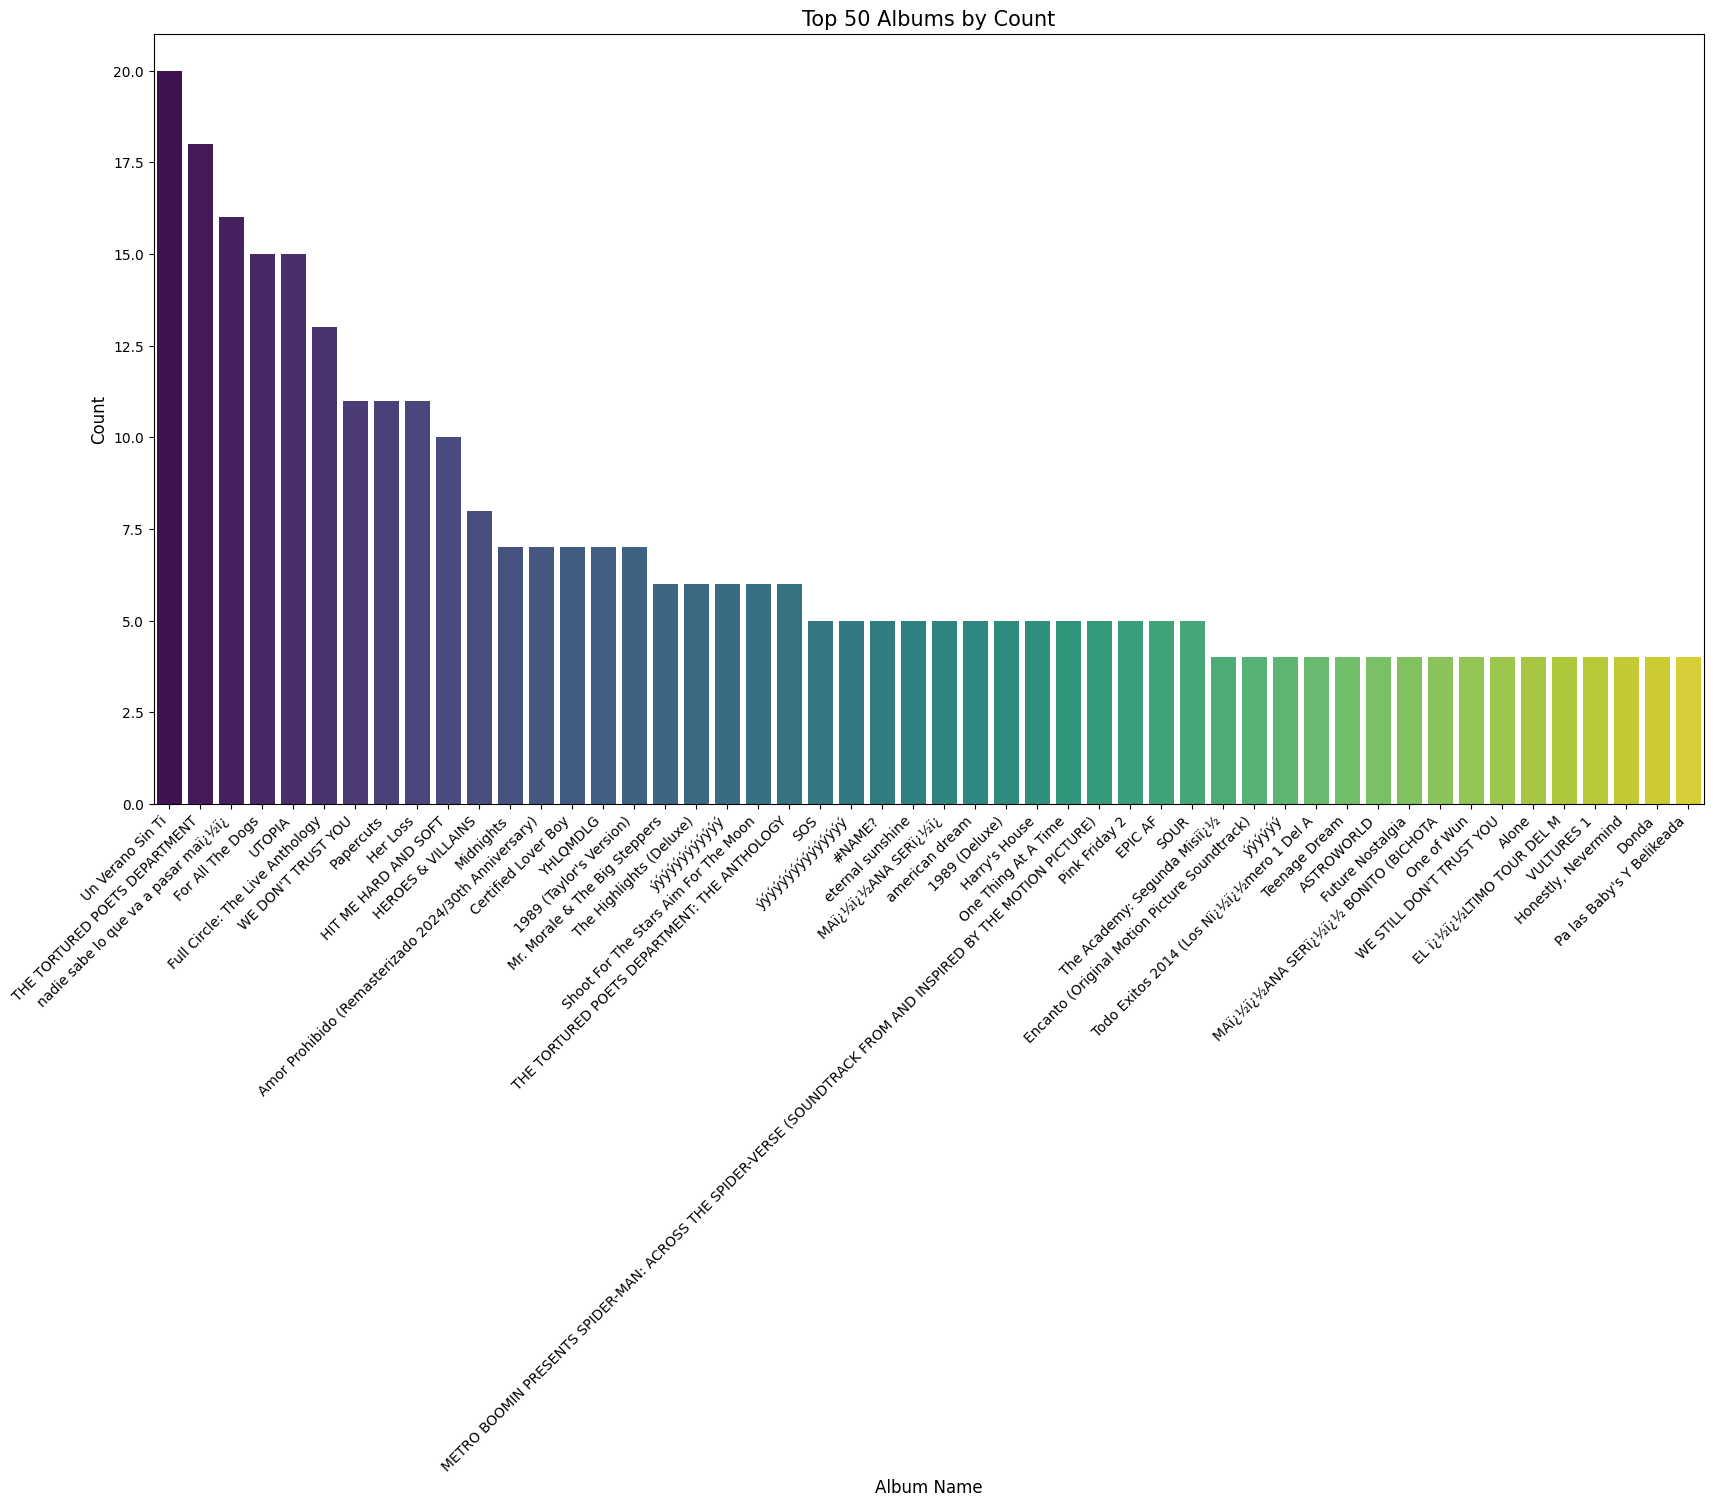

In [16]:
top_albums_df = top_albums.reset_index()
top_albums_df.columns = ['Album Name', 'Count']

plt.figure(figsize=(20, 10))
sns.barplot(x='Album Name', y='Count', data=top_albums_df, palette='viridis')
plt.title('Top 50 Albums by Count', fontsize=15)
plt.xlabel('Album Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-17-2ea31b28d6fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Track', y='Count', data=top_tracks_df, palette='viridis')


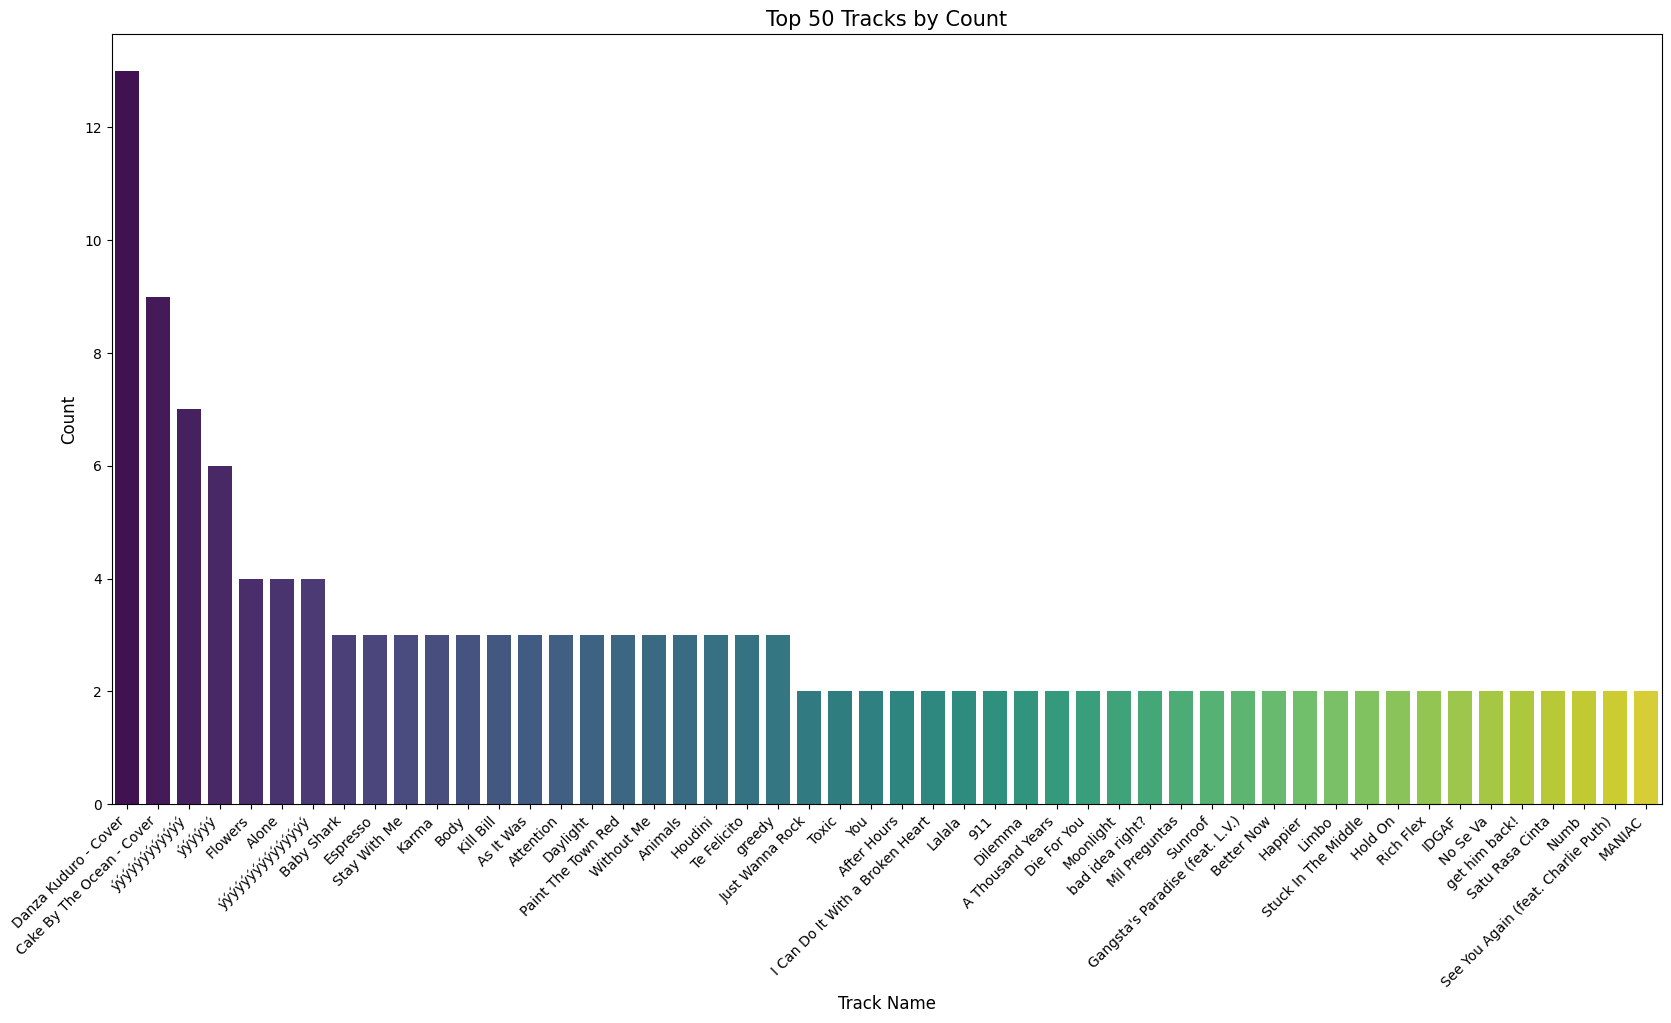

In [17]:
top_tracks = df['Track'].value_counts().nlargest(50)

top_tracks_df = top_tracks.reset_index()
top_tracks_df.columns = ['Track', 'Count']

plt.figure(figsize=(20, 10))
sns.barplot(x='Track', y='Count', data=top_tracks_df, palette='viridis')
plt.title('Top 50 Tracks by Count', fontsize=15)
plt.xlabel('Track Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
top_artist = df['Artist'].value_counts().nlargest(50)
top_artist

,count
Artist,
Taylor Swift,63
Drake,63
Bad Bunny,60
KAROL G,32
The Weeknd,31
Travis Scott,30
Billie Eilish,27
Ariana Grande,26
Future,23


<ipython-input-19-c9dd289286a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Count', data = top_artist_df, palette='viridis')


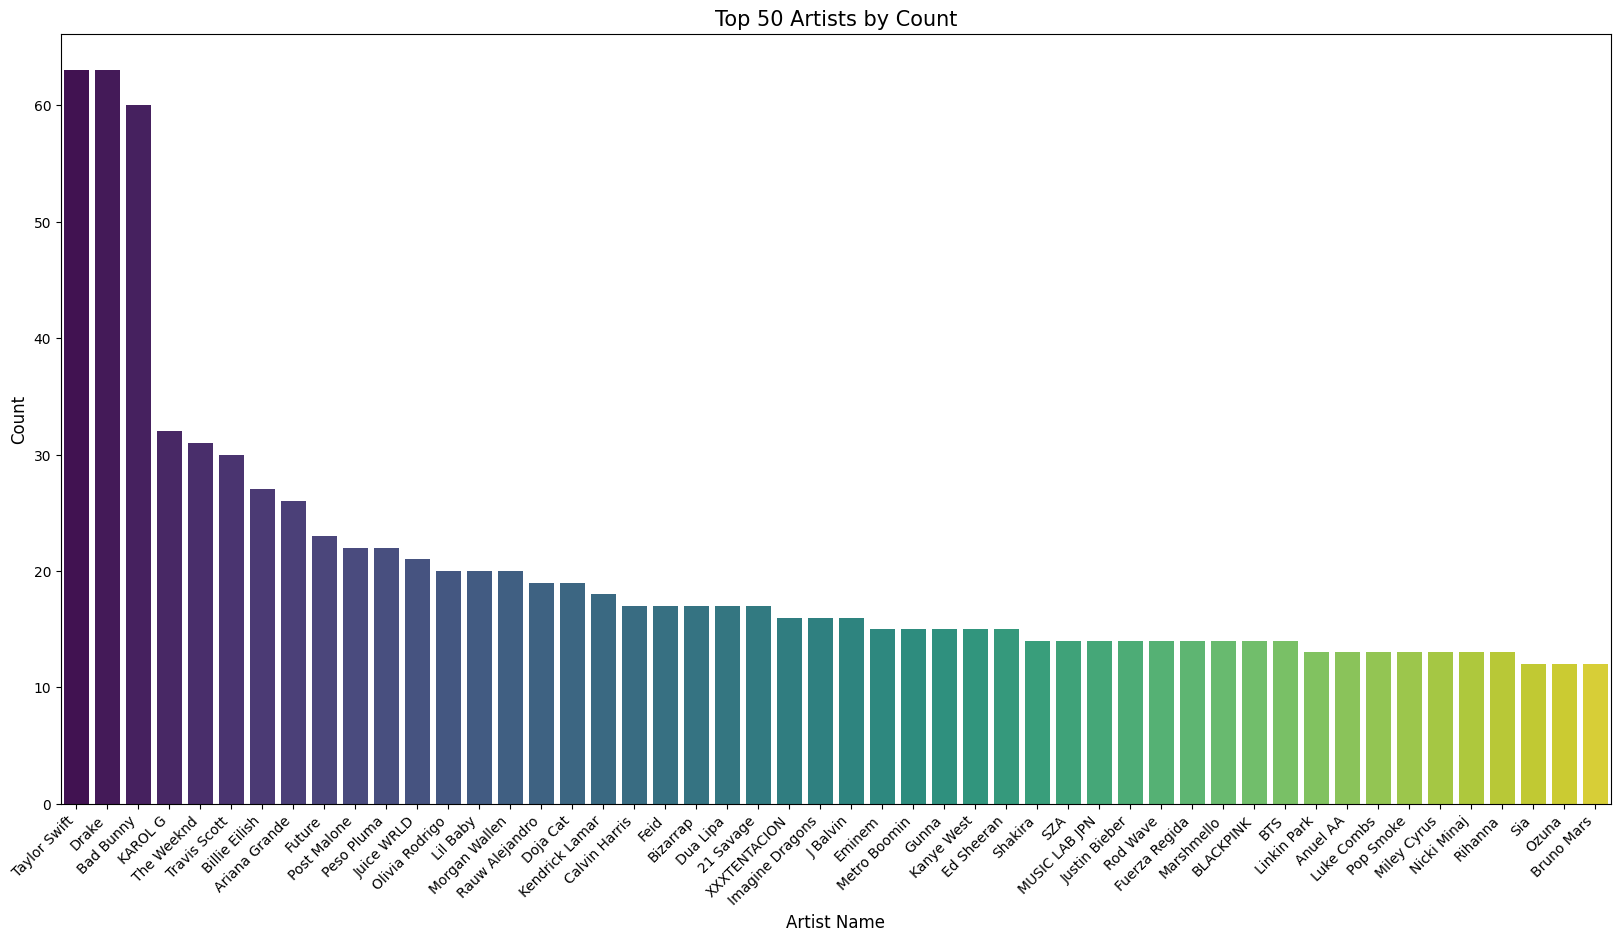

In [19]:
top_artist_df = top_artist.reset_index()
top_artist_df.columns = ['Artist', 'Count']

plt.figure(figsize=(20, 10))
sns.barplot(x='Artist', y='Count', data = top_artist_df, palette='viridis')
plt.title('Top 50 Artists by Count', fontsize=15)
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
top_ranked_artist=df[['Artist','All Time Rank']]
top_20artist = top_ranked_artist.head(20)

top_20artist


,Artist,All Time Rank
0,Tommy Richman,1
1,Kendrick Lamar,2
2,Artemas,3
3,Miley Cyrus,4
4,Eminem,5
5,Jack Harlow,6
6,Benson Boone,7
7,FloyyMenor,8
8,MUSIC LAB JPN,9
9,Central Cee,10


<ipython-input-21-9a23e602de7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20artist['Artist'],y=top_20artist['All Time Rank'],palette='viridis')


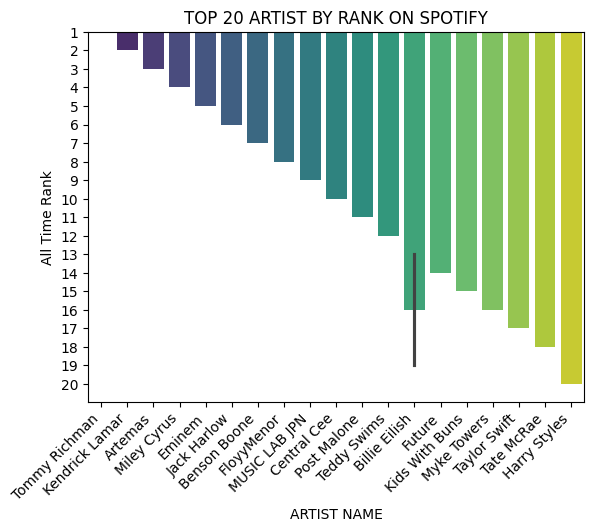

In [21]:
plt.title("TOP 20 ARTIST BY RANK ON SPOTIFY")
plt.xlabel("ARTIST NAME")
sns.barplot(x=top_20artist['Artist'],y=top_20artist['All Time Rank'],palette='viridis')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [22]:
least_20artist=top_ranked_artist.tail(20)
least_20artist


,Artist,All Time Rank
4580,Dominic Fike,"4,535"
4581,SR,"4,565"
4582,Bring Me The Horizon,"4,544"
4583,347aidan,"4,541"
4584,J Balvin,"4,553"
4585,Baby Keem,"4,537"
4586,Serranow,"4,556"
4587,Brytiago,"4,554"
4588,Steps,"4,562"
4589,Kerim Araz,"4,534"


<ipython-input-23-3c74ca35fe2d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_20artist['Artist'],y=least_20artist['All Time Rank'],palette='viridis')


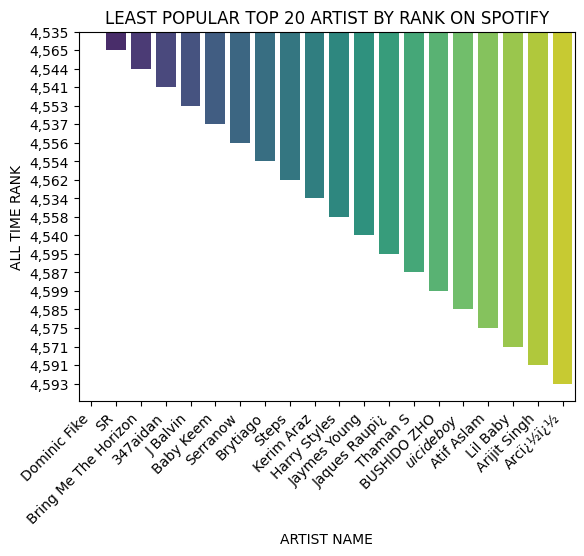

In [23]:
plt.title("LEAST POPULAR TOP 20 ARTIST BY RANK ON SPOTIFY")
plt.xlabel("ARTIST NAME")
plt.ylabel("ALL TIME RANK")
sns.barplot(x=least_20artist['Artist'],y=least_20artist['All Time Rank'],palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.show()

<ipython-input-24-f27416701328>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Track', y='Spotify Streams', data=top_streamed, palette='Blues_d')
<ipython-input-24-f27416701328>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Artist', y='Spotify Streams', data=top_streamed, palette='Greens_d')


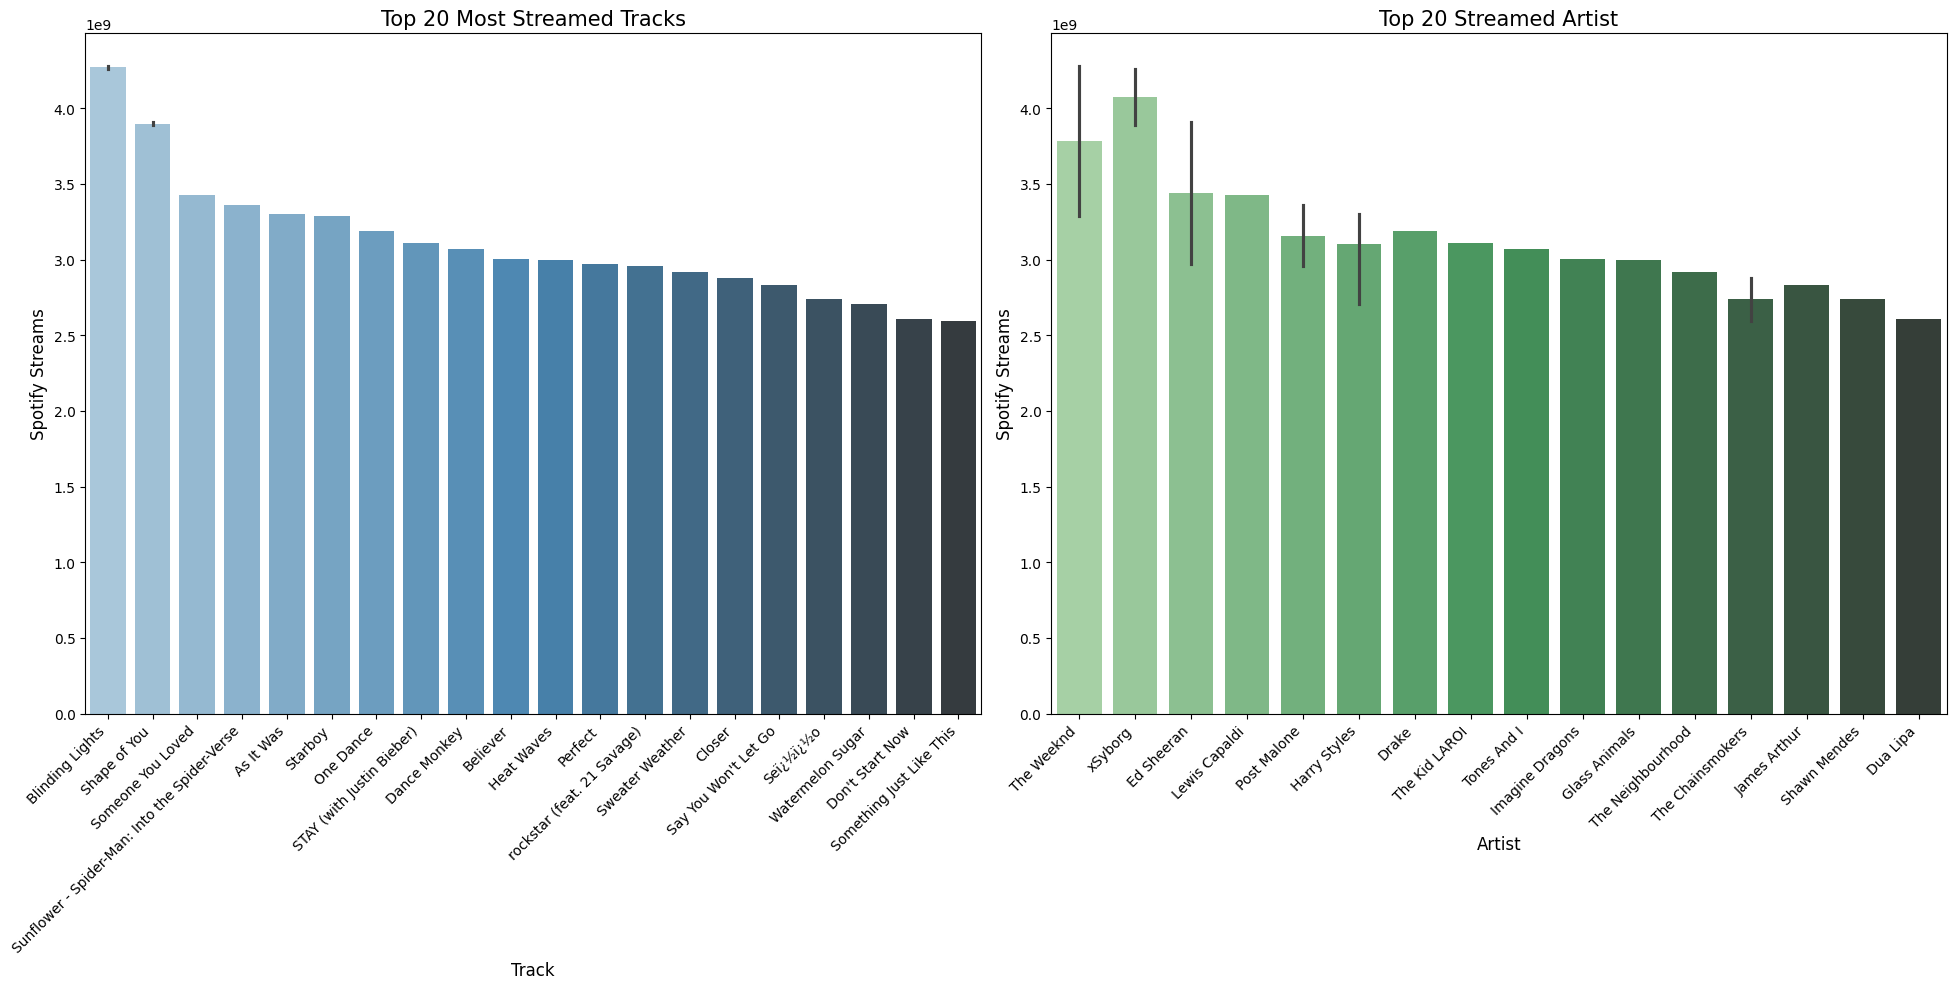

In [24]:
import matplotlib.pyplot as mp
import seaborn as sn

# Step 1: Sort the data by 'Spotify Streams' in descending order
top_streamed = df.sort_values(by='Spotify Streams', ascending=False).head(24)

# Step 2: Create a figure with two subplots
mp.figure(figsize=(20, 10))

# Plot 1: Top 10 Most Streamed Tracks
mp.subplot(1, 2, 1)
sn.barplot(x='Track', y='Spotify Streams', data=top_streamed, palette='Blues_d')
mp.title('Top 20 Most Streamed Tracks', fontsize=15)
mp.xlabel('Track', fontsize=12)
mp.ylabel('Spotify Streams', fontsize=12)
mp.xticks(rotation=45, ha='right')

# Plot 2: Corresponding Artists for Top 10 Most Streamed Tracks
mp.subplot(1, 2, 2)
sn.barplot(x='Artist', y='Spotify Streams', data=top_streamed, palette='Greens_d')
mp.title('Top 20 Streamed Artist', fontsize=15)
mp.xlabel('Artist', fontsize=12)
mp.ylabel('Spotify Streams', fontsize=12)
mp.xticks(rotation=45, ha='right')

# Step 3: Adjust layout and show the plots
mp.tight_layout()
mp.show()


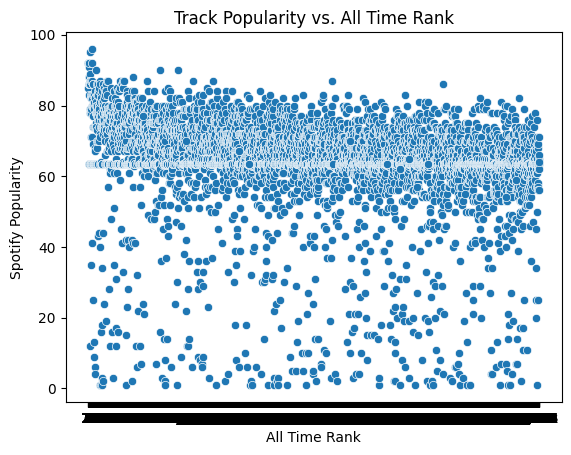

In [26]:
sns.scatterplot(x='All Time Rank', y='Spotify Popularity', data=df)
plt.title('Track Popularity vs. All Time Rank')
plt.xlabel('All Time Rank')
plt.ylabel('Spotify Popularity')
plt.show()

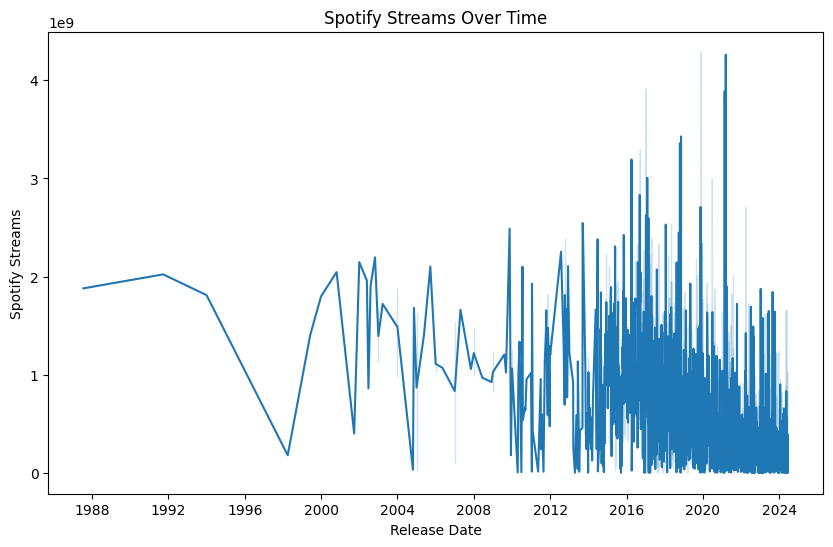

In [27]:
# Explore the relationship between the release date of songs and their stream counts. This could reveal trends like whether newer songs tend to have more streams.

df['Release Date'] = pd.to_datetime(df['Release Date'])  # Ensure the date is in datetime format
df_sorted = df.sort_values('Release Date')
mp.figure(figsize=(10, 6))
sn.lineplot(x='Release Date', y='Spotify Streams', data=df_sorted)
mp.title('Spotify Streams Over Time')
mp.xlabel('Release Date')
mp.ylabel('Spotify Streams')
mp.show()

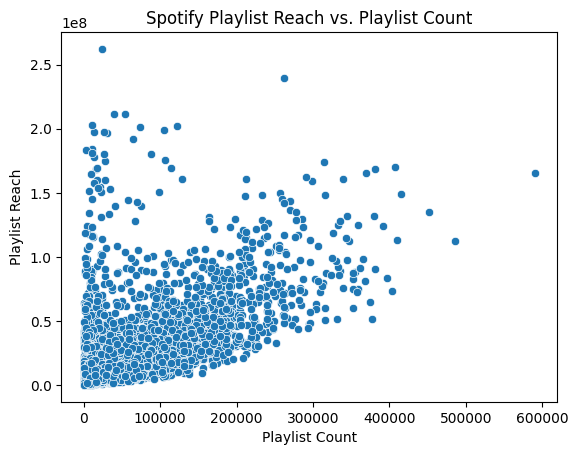

In [28]:
# Analyze the relationship between the number of playlists a song is in and the reach it has across those playlists.

sn.scatterplot(x='Spotify Playlist Count', y='Spotify Playlist Reach', data=df)
mp.title('Spotify Playlist Reach vs. Playlist Count')
mp.xlabel('Playlist Count')
mp.ylabel('Playlist Reach')
mp.show()

<ipython-input-29-3dc5df6d815b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Track', y='Spotify Playlist Count', data=top_tracks_playlist, palette='coolwarm')


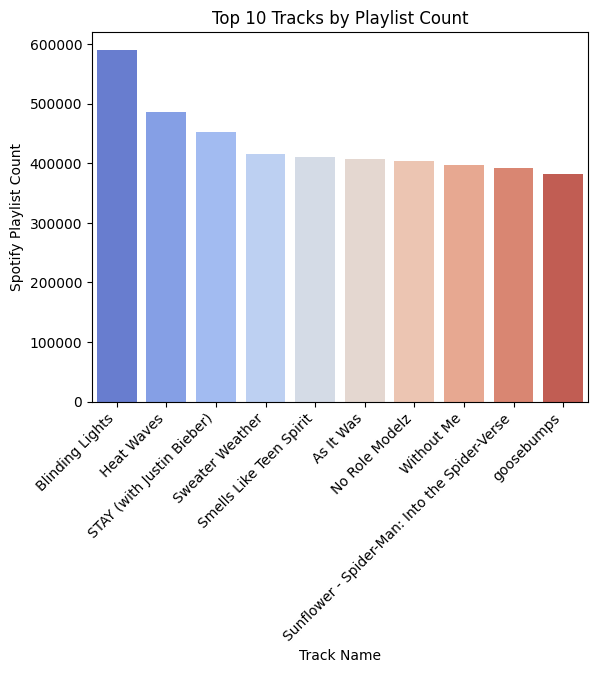

In [29]:
top_tracks_playlist = df.sort_values(by='Spotify Playlist Count', ascending=False).head(10)
sn.barplot(x='Track', y='Spotify Playlist Count', data=top_tracks_playlist, palette='coolwarm')
mp.title('Top 10 Tracks by Playlist Count')
mp.xlabel('Track Name')
mp.ylabel('Spotify Playlist Count')
mp.xticks(rotation=45, ha='right')
mp.show()

In [30]:
sorted_df = df.sort_values(by='Spotify Streams', ascending=False)
sorted_df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206,56,194.0,4.281469e+09,590392.0,165544011.0,83.000000
4254,Blinding Lights,Blinding Lights,xSyborg,2021-03-13,QZLBC2302779,"4,229",20.5,4.261328e+09,32312.5,13264111.5,63.498682
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,GBAHS1600463,54,195.1,3.909459e+09,316378.0,148037882.0,80.000000
1637,Shape of You,Shape of You,xSyborg,2021-02-20,QZLBC2302789,"1,807",36.3,3.888356e+09,32312.5,13264111.5,63.498682
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,DEUM71807062,133,129.7,3.427499e+09,338763.0,160553919.0,82.000000
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,USUM71814888,116,143.9,3.358704e+09,392082.0,123917182.0,79.000000
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20,292.0,3.301815e+09,407119.0,169783402.0,87.000000
3406,As It Was,As It Was (Official Video),Harry Styles,2022-03-31,USSM22200594,"3,410",23.5,3.299082e+09,1.0,1.0,63.498682
262,Starboy,Starboy,The Weeknd,2016-09-22,USUG11600976,265,95.7,3.291262e+09,366133.0,98022646.0,84.000000
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,USCM51600028,518,67.9,3.192204e+09,379853.0,131832723.0,82.000000


In [31]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [32]:
!pip install -q streamlit


In [42]:
!npm install localtunnel



up to date, audited 23 packages in 525ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run streamlit.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com



34.30.240.180
your url is: https://rotten-grapes-sit.loca.lt
